In [20]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [8]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

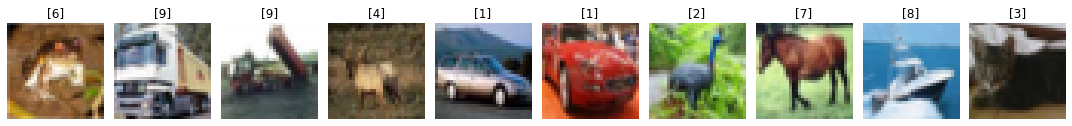

In [17]:
fig,ax = plt.subplots(ncols = 10, nrows = 1, figsize = (15,7))

for ax,image,label in zip(ax, train_images, train_labels):
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')
    plt.tight_layout()
        
plt.show()

In [19]:
train_images.shape

(50000, 32, 32, 3)

In [31]:
model = Sequential([
    Conv2D(32, 3, padding = 'same', input_shape = (32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, 3,padding = 'same', activation = 'relu'),
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, 3, activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(10, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)         

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = 'SparseCategoricalCrossentropy', metrics = ['acc'])

In [ ]:
model.fit(train_images, train_labels, validation_split = 0.1, epochs = 10, batch_size = 32, verbose = 2)

Epoch 1/10
1407/1407 - 251s - loss: 2.3587 - acc: 0.1004 - val_loss: 2.3035 - val_acc: 0.0950
Epoch 2/10
1407/1407 - 240s - loss: 2.3041 - acc: 0.0991 - val_loss: 2.3044 - val_acc: 0.0958
Epoch 3/10
1407/1407 - 236s - loss: 2.3041 - acc: 0.0979 - val_loss: 2.3051 - val_acc: 0.0958
Epoch 4/10
1407/1407 - 290s - loss: 2.3041 - acc: 0.1001 - val_loss: 2.3049 - val_acc: 0.0958
Epoch 5/10
